## Homework 6

#### Q1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

##### a) What is M? A?

In [2]:
M = np.array([[0, 1, 1, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 1, 0]]).T

In [3]:
def network_adjacency(M):

    n, p = M.shape
    A = np.zeros([n, p])

    for j in range(p):
        denominator = np.sum(M[:, j])

        if denominator != 0:
            for i in range(n):
                A[i, j] = M[i, j]/denominator

        # dangling nodes: no pages to point
        else:
            for i in range(n):
                A[i, j] = 1/n
    return A


In [4]:
A = network_adjacency(M)
print("Matrix M:")
print(M)
print("From matrix M get adjacency matrix A:")
print(A)

Matrix M:
[[0 0 1 0]
 [1 0 0 0]
 [1 1 0 1]
 [0 0 0 0]]
From matrix M get adjacency matrix A:
[[0.  0.  1.  0. ]
 [0.5 0.  0.  0. ]
 [0.5 1.  0.  1. ]
 [0.  0.  0.  0. ]]


##### b) Power Iteration for $\hat{\pi}$

In [5]:
# initial guess:

def power_iteration(A, k=20, max_diff=0.1):
    '''
    Compute pi_hat for matrix A using power iteration

    Inputs:
      A: matrix
      k: max times of iteration
      max_diff: l2 norm of max difference between new prediction
        vector and the last vector
    '''

    _, p = A.shape
    # initial guess
    pi_hat = np.ones(p) /p

    for _ in range(k):
        pi_new = A @ pi_hat
        pi_hat = pi_new / np.linalg.norm(pi_new)
        if np.linalg.norm(pi_new - pi_hat) < max_diff:
            return pi_new
        pi_hat = pi_new
    
    return pi_hat

In [6]:
pi_hat = power_iteration(A)
print("With max number of iterations = 20 \nand max l2 norm of difference of predictions = 0.1\n\
The Page Rank of the 4 pages are\n",
pi_hat)

With max number of iterations = 20 
and max l2 norm of difference of predictions = 0.1
The Page Rank of the 4 pages are
 [0.40014648 0.19970703 0.40014648 0.        ]


##### 3) Use google matrix G with damping factor

$G$ = $αA$ + (1 − $α$)$u$ ***1***$^T$ where $u$ = ***1***

In [7]:
def damped_adjacency(M, alpha):
    '''
    Inputs:
      M: network adjacency matrix (n * n)
      alpha: damping factor
    Return:
      G: google matrix (n * n)
    '''

    # regular google marix A
    A = network_adjacency(M)
    n, _ = A.shape
    u = np.ones(n)/n
    one_vec = np.ones(n)

    G = alpha * A + (1 - alpha) * (1/n) * np.outer(u, one_vec.T)
    # nomalize G
    G = G/G.sum(axis=0)
    print(G)

    return G


In [11]:
G = damped_adjacency(M, 0.8)
pi_hat = power_iteration(G)

print("With max number of iterations = 20 \nand max l2 norm of difference of predictions = 0.1\n\
The damped Page Rank of the 4 pages are\n",
pi_hat)


[[0.01470588 0.01470588 0.95588235 0.01470588]
 [0.48529412 0.01470588 0.01470588 0.01470588]
 [0.48529412 0.95588235 0.01470588 0.95588235]
 [0.01470588 0.01470588 0.01470588 0.01470588]]
With max number of iterations = 20 
and max l2 norm of difference of predictions = 0.1
The damped Page Rank of the 4 pages are
 [0.38937284 0.19783764 0.39808364 0.01470588]


### Q2

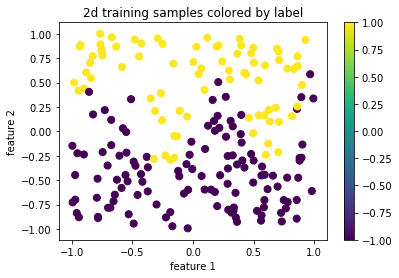

In [22]:
n = 200
p = 2
X = 2 * (np.random.rand(n,p)-.5)
y = np.sign(X[:,1] - (X[:,0]**2 / 2 + np.sin(X[:,0]*7) / 2))


plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], 50, c=y) 
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 2') 
plt.title('2d training samples colored by label') 
plt.show()


$\alpha = (\Phi \Phi^T + \lambda I)^{-1}y$ </p>
In Kernel form:</p>
$\hat{y} = \Phi w$, where $w = \Phi^T \alpha$ </p>
So $\hat{y} = \Phi w = \Phi \Phi^T \alpha = K \alpha$

In [99]:
sigma = 0.05 
lam = 1
# squared norm of each training sample
norms2 = (np.array(la.norm(X,axis=1)).T)**2
innerProds = X @ X.T
# squared distances between each pair of training samples
dist2 = np.matrix(norms2).T @ np.ones([1,n]) + np.ones([n,1]) @ np.matrix(norms2) - 2 * innerProds

# K is the Gaussian Kernel matrix with shape (200, 200)
K = np.exp( - dist2 / (2 * sigma**2))
# alpha has the shape (1, 200)
alpha = la.inv(K + lam * np.identity(n)) @ y
alpha = np.array(alpha)[0]
pred = K @ alpha
pred = np.array(pred)[0]

yhat = np.ones(n)
for i in range(n):
    if pred[i] < 0:
        yhat[i] = -1

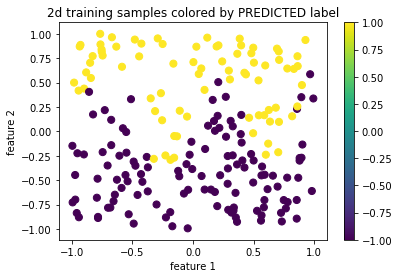

In [100]:
y2 = np.array(np.sign(yhat)) 
plt.figure(2)
plt.scatter(X[:, 0], X[:, 1], 50, c=y2) 
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 2') 
plt.title('2d training samples colored by PREDICTED label') 
plt.show()


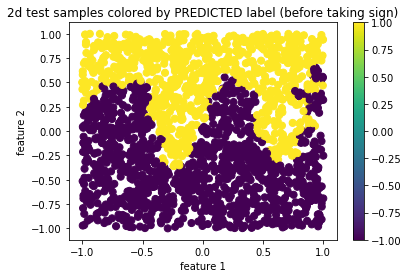

In [101]:
ntest = 2000
Xtest = 2 * (np.random.rand(ntest,p) - .5)
norms2_test = (np.array(la.norm(Xtest,axis=1)).T)**2 
innerProds_test = Xtest @ X.T
dist2_test = np.matrix(norms2_test).T@np.ones([1,n]) + np.ones([ntest ,1]) @ np.matrix(norms2) - 2 * innerProds_test 

K_test = np.exp( - dist2_test / (2 * sigma**2))
pred_test = K_test @ alpha
pred_test = np.array(pred_test)[0]

ytest = np.ones(ntest)
for i in range(ntest):
    if pred_test[i] < 0:
        ytest[i] = -1

plt.figure(3)
plt.scatter(Xtest[:,0], Xtest[:,1], 50, c=np.array(ytest)) 
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 2') 
plt.title('2d test samples colored by PREDICTED label (before taking sign)') 
plt.show()